In [1]:
import pandas as pd
df = pd.read_csv('../Modelos/CSV/persona3.csv', delimiter = ";").astype(str)
df.head(3)

,Puesto,Localidad,Skill,Trabajo,Column12
0,senior manufacturing manager,mexico,senior manager with experience on leading team...,primary education secondary,4
1,senior manager an accenture,naucalpan de juarez mexico mexico,,information services and technologies,5
2,senior manager of valuations in kpmg,mexico city mexico,valuation services over ten years of experienc...,financial services,10


In [2]:
print(df['Skill'][0])

senior manager with experience on leading teams to develop continuous improvement strategies for manufacturing processes delivering excellent cost savings i am also specialist on implementing progressive maintenance program


In [3]:
col = ['Trabajo', 'Skill']
df = df[col]
df = df[pd.notnull(df['Skill'])]

df.columns = ['Trabajo', 'Skill']

df['category_id'] = df['Trabajo'].factorize()[0]

category_id_df = df[['Trabajo', 
    'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Trabajo']].values)
df.head(10)

,Trabajo,Skill,category_id
0,primary education secondary,senior manager with experience on leading team...,0
1,information services and technologies,,1
2,financial services,valuation services over ten years of experienc...,2
3,internet,dedicated focused on solutions i'm to dreamer;...,3
4,telecommunications,,4
5,alimentation and drinks,i am passionate about developing food products...,5
6,information services and technologies,,1
7,information services and technologies,over 9 years of experience as a technical lead...,1
8,information services and technologies,engineering manager with customer focus and te...,1
9,internet,,3


# Imbalanced Classes

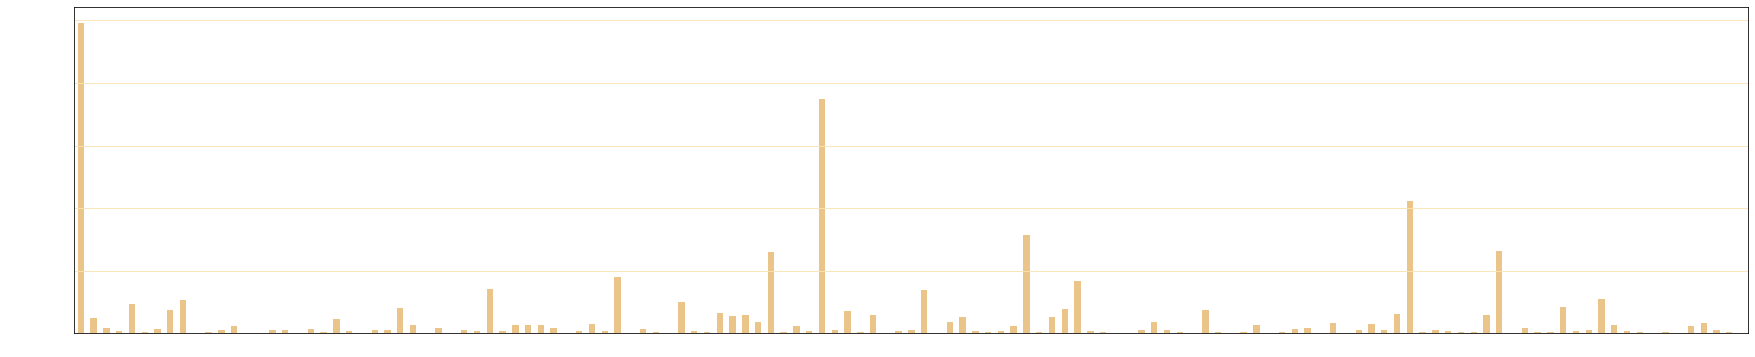

In [21]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(30,6))
ax = plt.axes()

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='white')
# ax.set_facecolor("#0c1621")
# ax.set_title('LinkedIn', fontsize=40, color= 'white', fontweight='bold')
ax.axes.xaxis.set_visible(False)

df.groupby('Trabajo').Skill.count().plot.bar(ylim=0,color="#eac488")

plt.rc('font',family='Times New Roman')
plt.xticks(fontsize=20, rotation=90, family='Times New Roman')
plt.yticks(fontsize=30, family='Times New Roman')
# plt.grid(color = '#fbe4b4', linewidth = .9, axis='y')
plt.grid(color = '#fbe4b4', linewidth = .9)

plt.savefig("1.png", transparent=True)


In [23]:
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
print(my_stop_words)

frozenset({'many', 'and', 'except', 'otro', 'tuya', 'nuestros', 'tuvieras', 'era', 'habida', 'what', 'mí', 'inc', 'estuviéramos', 'tuviéramos', 'estuvieseis', 'seamos', 'esto', 'always', 'seem', 'estadas', 'hayamos', 'estéis', 'neither', 'los', 'hereby', 'further', 'un', 'cant', 'hubiéramos', 'hereupon', 'detail', 'i', 'antes', 'estuviera', 'hubieseis', 're', 'también', 'eras', 'estaba', 'this', 'move', 'thereafter', 'estuviese', 'sentido', 'fifteen', 'tendrá', 'herein', 'habíamos', 'whereupon', 'ten', 'thence', 'my', 'her', 'habríamos', 'cannot', 'call', 'whereby', 'míos', 'estados', 'está', 'formerly', 'tuviésemos', 'esta', 'while', 'something', 'estés', 'thus', 'once', 'am', 'fueran', 'fueseis', 'somewhere', 'de', 'estaríais', 'serás', 'sometimes', 'este', 'three', 'una', 'herself', 'wherein', 'tengo', 'him', 'fire', 'estás', 'hereafter', 'había', 'durante', 'serías', 'ellos', 'via', 'cry', 'moreover', 'over', 'by', 'thick', 'tendría', 'anyone', 'contra', 'teníais', 'habidas', 'tení

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

In [26]:
features = tfidf.fit_transform(df.Skill).toarray()
labels = df.category_id
features.shape

(6054, 5498)

In [27]:
from sklearn.feature_selection import chi2
import numpy as np
N = 3
for jobs, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  
  print("# '{}':".format(jobs))
  print("  * Most correlated unigrams:\n- {}".format('\n- '.join(unigrams[-N:])))
  print("  * Most correlated bigrams:\n- {}".format('\n- '.join(bigrams[-N:])))

# ' ':
  * Most correlated unigrams:
- physiotherapy
- medicine
- medical
  * Most correlated bigrams:
- physical therapy
- faculty medicine
- mechanical engineer
# 'accounting':
  * Most correlated unigrams:
- pay
- accounting
- taxes
  * Most correlated bigrams:
- financial statements
- developing professionally
- general accounting
# 'aeronautics  aviation':
  * Most correlated unigrams:
- rhythm
- jobsvolariscom
- volaris
  * Most correlated bigrams:
- want integrate
- rhythm operation
- standards want
# 'aerospace and aviation industry':
  * Most correlated unigrams:
- pan
- week
- aviation
  * Most correlated bigrams:
- american university
- pan american
- recently graduated
# 'alimentation and drinks':
  * Most correlated unigrams:
- inspiring
- food
- consumer
  * Most correlated bigrams:
- experience personnel
- objective apply
- development company
# 'architecture and planning':
  * Most correlated unigrams:
- receivable
- wcf
- origin
  * Most correlated bigrams:
- ability d

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Skill'], df['Trabajo'], random_state = 0)


count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
print (len(models))

4


In [29]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []


for model in models: 
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

c:\Users\Ricardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Ricardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Ricardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Ricardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


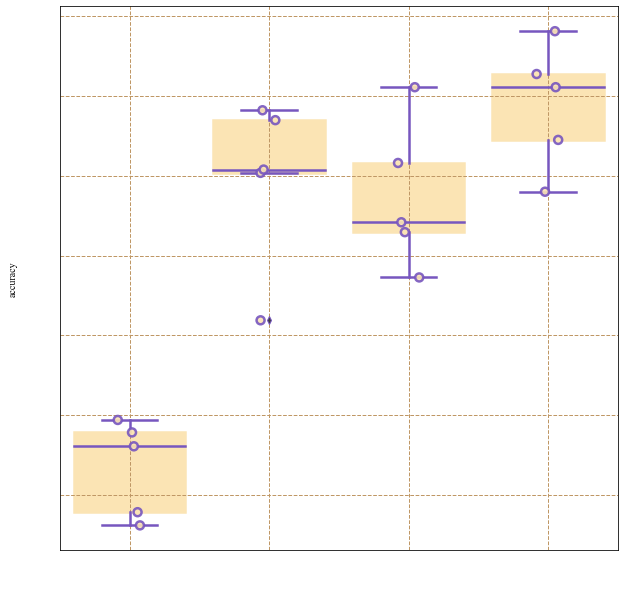

In [30]:
import seaborn as sns

fig = plt.figure(figsize=(10,10),facecolor='white')
plt.rc('font',family='Times New Roman')
ax = plt.axes()

c = "#7756BF"
b = "#fbe4b4"

sns.boxplot(x='model_name', y='accuracy',
    boxprops=dict(facecolor=c, color=b), 
    capprops=dict(color=c),
    whiskerprops=dict(color=c),
    flierprops=dict(color=c, markeredgecolor=c),
    medianprops=dict(color=c),
    data=cv_df, linewidth=2.5
    )

sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
    size=8, jitter=True,color=b, edgecolor=c, alpha=.90,
    linewidth=2.5, 
    )

plt.xticks(rotation=0,fontsize=18)
plt.yticks(fontsize=18)
plt.grid(color = '#BF9765', linestyle = '--', linewidth = 1)
# plt.tick_params(axis='both', which='major', labelsize=18)

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')

sns.set(font_scale=0)


plt.savefig("Comparativa_de_Modelos.png", transparent=True)
plt.show()

In [31]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.279314
LogisticRegression        0.297816
MultinomialNB             0.274856
RandomForestClassifier    0.206972
Name: accuracy, dtype: float64